In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix ,classification_report

## Import dataset

In [3]:
data  = pd.read_csv("datasets/dataset.csv" )
data_sevrity = pd.read_csv("datasets/Symptom-severity.csv")

In [4]:
data.describe()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
count,4920,4920,4920,4920,4572,3714,2934,2268,1944,1692,1512,1194,744,504,306,240,192,72
unique,41,34,48,54,50,38,32,26,21,22,21,18,11,8,4,3,3,1
top,AIDS,vomiting,vomiting,fatigue,high_fever,headache,nausea,abdominal_pain,abdominal_pain,yellowing_of_eyes,yellowing_of_eyes,irritability,malaise,malaise,chest_pain,chest_pain,blood_in_sputum,muscle_pain
freq,120,822,870,726,378,348,390,264,276,228,198,120,126,72,96,144,72,72


In [5]:
data.shape

(4920, 18)

In [6]:
np.sum(data.isnull())

Disease          0
Symptom_1        0
Symptom_2        0
Symptom_3        0
Symptom_4      348
Symptom_5     1206
Symptom_6     1986
Symptom_7     2652
Symptom_8     2976
Symptom_9     3228
Symptom_10    3408
Symptom_11    3726
Symptom_12    4176
Symptom_13    4416
Symptom_14    4614
Symptom_15    4680
Symptom_16    4728
Symptom_17    4848
dtype: int64

In [7]:
data["Symptom_17"].unique()

array([nan, ' muscle_pain'], dtype=object)

In [8]:
data.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal infection,itching,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal infection,skin_rash,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal infection,itching,nodal_skin_eruptions,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal infection,itching,skin_rash,dischromic _patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data.dtypes

Disease       object
Symptom_1     object
Symptom_2     object
Symptom_3     object
Symptom_4     object
Symptom_5     object
Symptom_6     object
Symptom_7     object
Symptom_8     object
Symptom_9     object
Symptom_10    object
Symptom_11    object
Symptom_12    object
Symptom_13    object
Symptom_14    object
Symptom_15    object
Symptom_16    object
Symptom_17    object
dtype: object

### Visualisation de  symptom severity

In [10]:
data_sevrity.describe()

,weight
count,133.000000
mean,4.225564
std,1.323543
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,7.000000


In [11]:
data_sevrity.head()

,Symptom,weight
0,itching,1
1,skin_rash,3
2,nodal_skin_eruptions,4
3,continuous_sneezing,4
4,shivering,5


In [12]:
data_sevrity.shape

(133, 2)

In [ ]:
# this plot is to check if target is balance

Text(0.5, 0, 'name of disease')

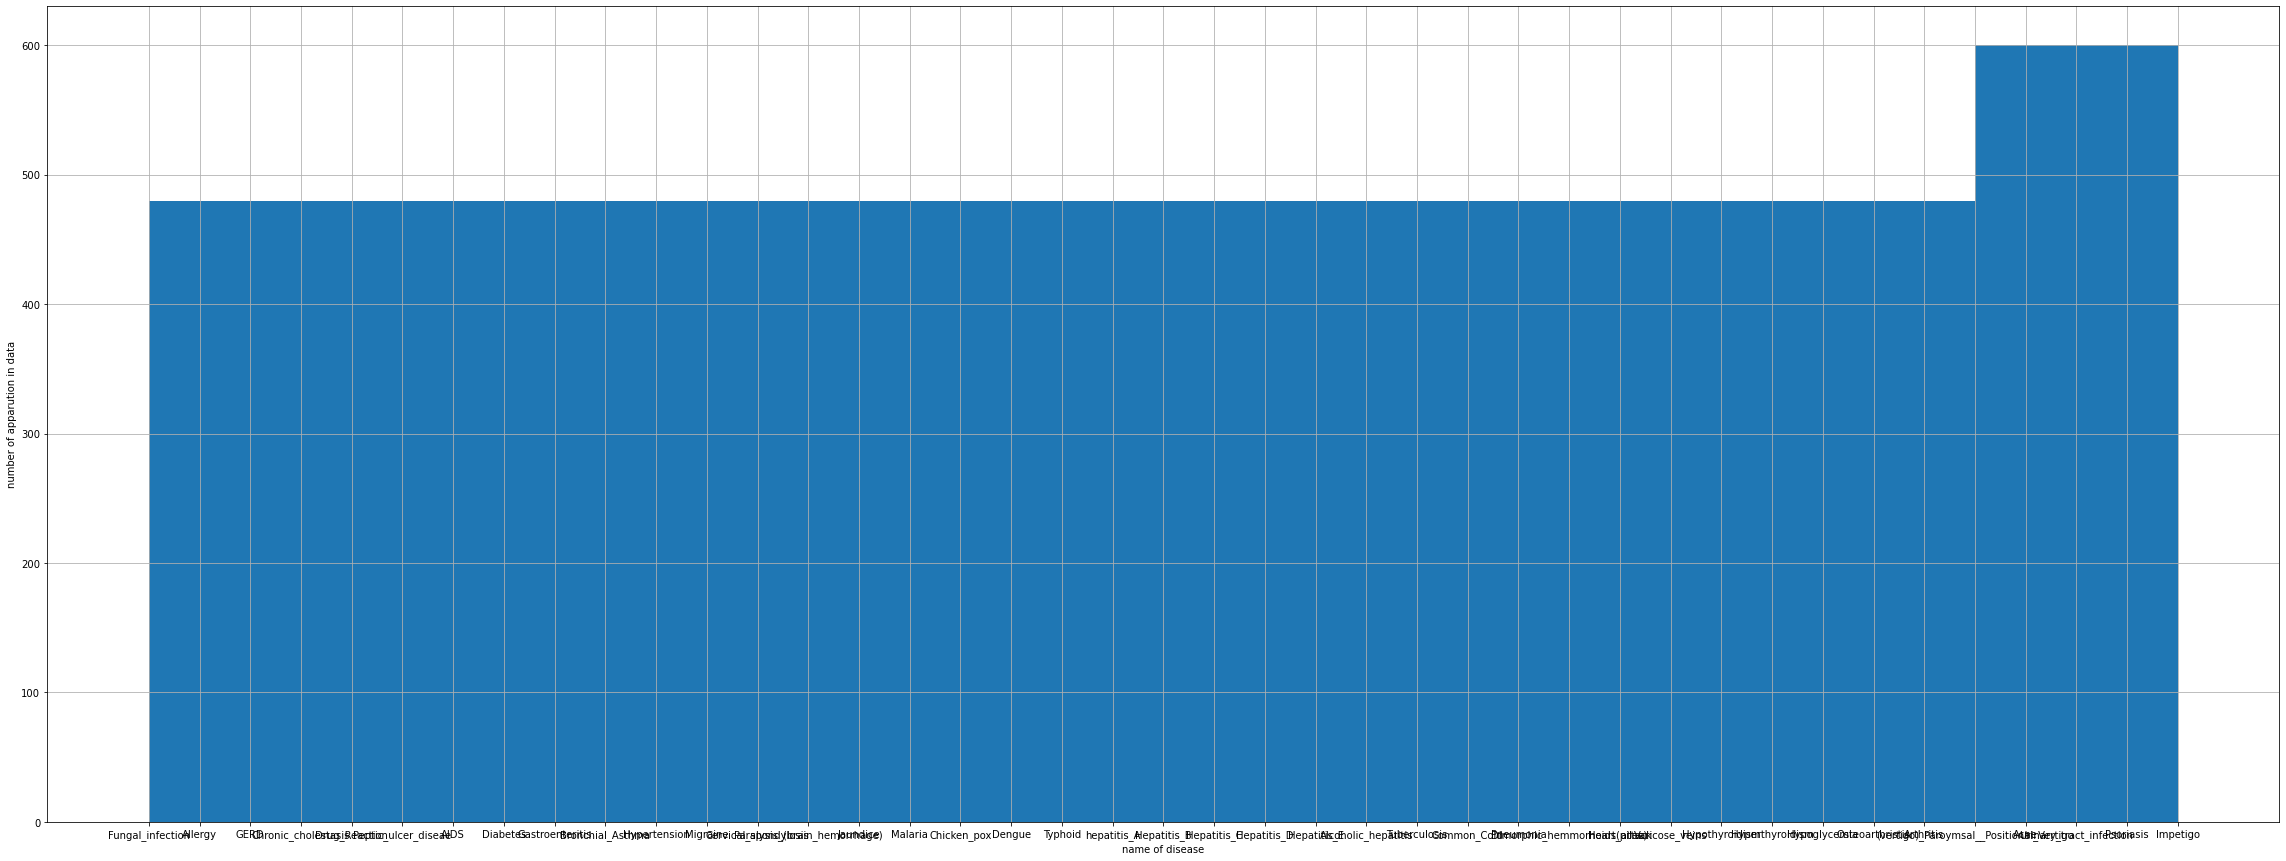

In [98]:
fig = plt.figure(figsize=(40, 15))
ax = fig.gca()
data["Disease"].hist(ax =ax)
plt.ylabel("number of apparution in data")
plt.xlabel("name of disease")

array([[<AxesSubplot:title={'center':'weight'}>]], dtype=object)

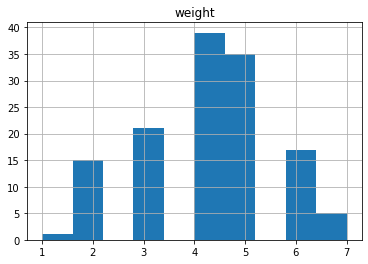

In [13]:
data_sevrity.hist()

#### Cette table contient les symptomes et leur encodages

In [14]:
data_sevrity["weight"].unique()

array([1, 3, 4, 5, 6, 2, 7])

In [15]:
data_sevrity["Symptom"].unique()

array(['itching', 'skin_rash', 'nodal_skin_eruptions',
       'continuous_sneezing', 'shivering', 'chills', 'joint_pain',
       'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting',
       'vomiting', 'burning_micturition', 'spotting_urination', 'fatigue',
       'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings',
       'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat',
       'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes',
       'breathlessness', 'sweating', 'dehydration', 'indigestion',
       'headache', 'yellowish_skin', 'dark_urine', 'nausea',
       'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain',
       'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever',
       'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure',
       'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes',
       'malaise', 'blurred_and_distorted_vision', 'phlegm',
       'throat_irritation', 'redness_of_eyes', 'sinus_pressu

In [16]:
#length of unique data sevrity column
len(data_sevrity["Symptom"].unique())

132

In [17]:
unique_symptom = data_sevrity["Symptom"].unique()

#### We remark that many symptoms have same weigth

### Replace symptoms name with thier weigth

In [18]:
#convert data_severity to dictionnary
data_dict = data_sevrity.set_index('Symptom').T.to_dict()


/tmp/ipykernel_5250/4152288515.py:2: UserWarning: DataFrame columns are not unique, some columns will be omitted.
  data_dict = data_sevrity.set_index('Symptom').T.to_dict()


In [19]:
# we have 132 because  2 deseases are repeted in  dataset
print(" length of data_severity  is " , len(data_dict))

 length of data_severity  is  132


In [20]:
#d = data.copy()

In [21]:
#for col in d.columns:
#    for i in range(len(d[col])):
#        if (type(d[col][i]) == str ):
#            d[col][i] = d[col][i].strip()
#            d[col][i] = d[col][i].replace(" ", "_")

In [22]:
def remove_space_between_word(dataset):
    for col in dataset.columns:
        for i in range(len(dataset[col])):
            if (type(dataset[col][i]) == str ):
                dataset[col][i] = dataset[col][i].strip()
                dataset[col][i] = dataset[col][i].replace(" ", "_")
    return dataset


In [23]:
new_df = remove_space_between_word(data)
new_df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal_infection,itching,skin_rash,nodal_skin_eruptions,dischromic__patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fungal_infection,skin_rash,nodal_skin_eruptions,dischromic__patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fungal_infection,itching,nodal_skin_eruptions,dischromic__patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Fungal_infection,itching,skin_rash,dischromic__patches,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Fungal_infection,itching,skin_rash,nodal_skin_eruptions,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:

def encode_data(dataset , data_dict_weigth):
    cols = dataset.columns
    for columnName in cols:
        for i in range(len(dataset[columnName])):
            try:
            #print(data_dict[data2[columnName][i]]["weight"])
                dataset[columnName][i] = data_dict[dataset[columnName][i]]["weight"]
            except:
                pass
    dataset = dataset.fillna(0) # put empty cell to 0
    dataset = dataset.replace("foul_smell_of_urine" , 5)
    dataset = dataset.replace("dischromic__patches" , 6)
    dataset = dataset.replace("spotting__urination" , 6)
    return dataset
    
    

In [25]:
print(data_dict["foul_smell_ofurine"])
print(data_dict["dischromic_patches"])
print(data_dict["spotting_urination"])

{'weight': 5}
{'weight': 6}
{'weight': 6}


In [26]:
df = encode_data(new_df , data_dict)
df.head()

,Disease,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Symptom_5,Symptom_6,Symptom_7,Symptom_8,Symptom_9,Symptom_10,Symptom_11,Symptom_12,Symptom_13,Symptom_14,Symptom_15,Symptom_16,Symptom_17
0,Fungal_infection,1,3,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Fungal_infection,3,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Fungal_infection,1,4,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Fungal_infection,1,3,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Fungal_infection,1,3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
#check if all Symptoms are replace by their weigth
names = []
for col in df.columns:
    if(col != "Disease"):
        for i in range(len(df[col])):
            if (type(df[col][i]) == str ):
                if df[col][i] not in names :
                    names.append(df[col][i])
                    
print(" no replace are :" , names)       

 no replace are : []


In [56]:
df_data = df.drop('Disease' , axis =1)
label = data["Disease"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_data, label, shuffle=True, train_size = 0.70)

In [61]:
randomFC = RandomForestClassifier()
randomFC.fit(x_train, y_train)
result = randomFC.predict(x_test)
print(randomFC)
print(classification_report(y_true=y_test, y_pred=result))
print('F1-score% =', f1_score(y_test, result, average='macro')*100, '|', 'Accuracy% =', accuracy_score(y_test, result)*100)


RandomForestClassifier()
                                         precision    recall  f1-score   support

(vertigo)_Paroymsal__Positional_Vertigo       1.00      1.00      1.00        34
                                   AIDS       1.00      1.00      1.00        37
                                   Acne       1.00      1.00      1.00        37
                    Alcoholic_hepatitis       1.00      1.00      1.00        35
                                Allergy       0.90      1.00      0.95        28
                              Arthritis       1.00      1.00      1.00        44
                       Bronchial_Asthma       1.00      1.00      1.00        30
                   Cervical_spondylosis       1.00      0.92      0.96        37
                            Chicken_pox       1.00      1.00      1.00        37
                    Chronic_cholestasis       1.00      1.00      1.00        35
                            Common_Cold       1.00      1.00      1.00        33
  